# Recurrent Neural Network

* __Financial Market Time Series Prediction with Recurrent Neural Networks__

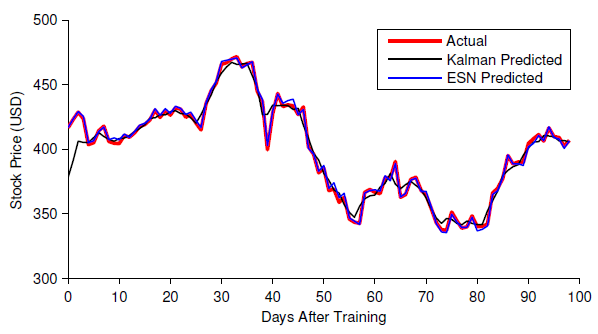

[BernalFokPidaparthi-FinancialMarketTimeSeriesPredictionwithRecurrentNeural.pdf](BernalFokPidaparthi-FinancialMarketTimeSeriesPredictionwithRecurrentNeural.pdf)

* __Recurrent Neural Networks Architecture__
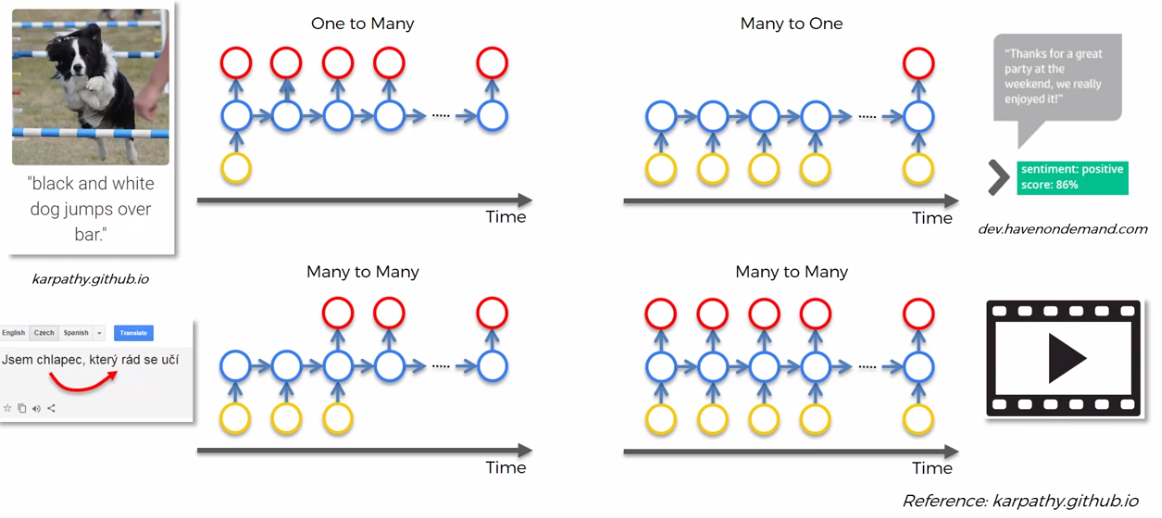

## Part 1 - Data Preprocessing

### Importing the libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [31]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [32]:
training_set = training_set.iloc[:,1:2].values
training_set[0:5,:]

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       [ 328.34],
       [ 322.04]])

### Feature Scaling

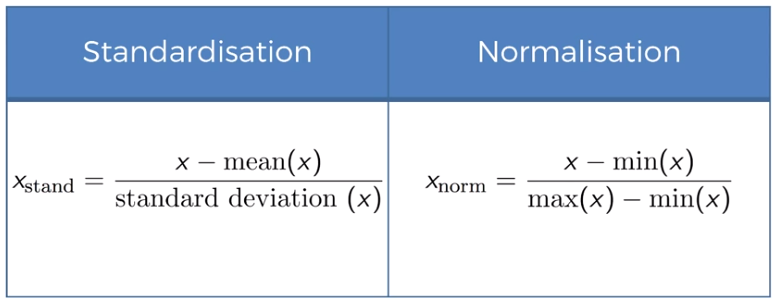

In [33]:
min(training_set), max(training_set), max(training_set) - min(training_set)

(array([ 279.12]), array([ 816.68]), array([ 537.56]))

In [34]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set[0:5,:], 

(array([[ 0.08581368],
        [ 0.09701243],
        [ 0.09433366],
        [ 0.09156187],
        [ 0.07984225]]),)

### Getting the inputs and the ouputs

In [35]:
X_train = training_set[0: len(training_set) - 1]
Y_train = training_set[1: len(training_set)]
len(training_set), len(X_train), len(Y_train)

(1258, 1257, 1257)

### Reshaping

__Keras Input__: 3D tensor with shape (batch_size, timesteps, input_dim), (Optional) 2D tensors with shape  (batch_size, output_dim).

In [7]:
X_train = np.reshape(X_train, (1257, 1, 1))
X_train.shape

(1257, 1, 1)

In [8]:
X_train[0:5,:,:]

array([[[ 0.08581368]],

       [[ 0.09701243]],

       [[ 0.09433366]],

       [[ 0.09156187]],

       [[ 0.07984225]]])

## Part 2 - Building the RNN

### Importing the Keras libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


### Initialising the RNN

In [10]:
regressor = Sequential()

### Adding the input layer and the LSTM layer

In [11]:
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, Y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 2s - loss: 0.6699     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.5172     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.3971     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.3043     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.2343     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.1819     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.1434     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.1161     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.0966     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.0834     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 0.0745     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 0.0685     
Epoch 13/200
1257/1257 [=============

1257/1257 [==============================] - 0s - loss: 2.6186e-04     
Epoch 102/200
1257/1257 [==============================] - 0s - loss: 2.5812e-04     
Epoch 103/200
1257/1257 [==============================] - 0s - loss: 2.5569e-04     
Epoch 104/200
1257/1257 [==============================] - 0s - loss: 2.5334e-04     
Epoch 105/200
1257/1257 [==============================] - 0s - loss: 2.5193e-04     
Epoch 106/200
1257/1257 [==============================] - 0s - loss: 2.5054e-04     
Epoch 107/200
1257/1257 [==============================] - 0s - loss: 2.4958e-04     
Epoch 108/200
1257/1257 [==============================] - 0s - loss: 2.4980e-04     
Epoch 109/200
1257/1257 [==============================] - 0s - loss: 2.4863e-04     
Epoch 110/200
1257/1257 [==============================] - 0s - loss: 2.4824e-04     
Epoch 111/200
1257/1257 [==============================] - 0s - loss: 2.4769e-04     
Epoch 112/200
1257/1257 [==============================] - 0s - loss

1257/1257 [==============================] - 0s - loss: 2.4678e-04     
Epoch 197/200
1257/1257 [==============================] - 0s - loss: 2.4599e-04     
Epoch 198/200
1257/1257 [==============================] - 0s - loss: 2.4705e-04     
Epoch 199/200
1257/1257 [==============================] - 0s - loss: 2.4661e-04     
Epoch 200/200
1257/1257 [==============================] - 0s - loss: 2.4587e-04     


In [15]:
regressor.save('Google_Stock_Price_Train.Model.h5')

In [40]:
from keras.models import load_model
regressor = load_model('Google_Stock_Price_Train.Model.h5')

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [60]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
test_set.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [61]:
real_stock_price = test_set.iloc[:,1:2].values
real_stock_price[0:5,:]

array([[ 778.81],
       [ 788.36],
       [ 786.08],
       [ 795.26],
       [ 806.4 ]])

### Getting the predicted stock price of 2017

In [62]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs[0:5, :], len(inputs)

(array([[ 0.92955205],
        [ 0.94731751],
        [ 0.94307612],
        [ 0.96015329],
        [ 0.98087655]]), 20)

In [63]:
inputs = np.reshape(inputs, (len(inputs), 1, 1))

In [64]:
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price[0:5,:]

array([[ 0.92863297],
       [ 0.94435048],
       [ 0.94060147],
       [ 0.95568383],
       [ 0.97394133]], dtype=float32)

In [65]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price[0:5,:]

array([[ 778.31591797],
       [ 786.76501465],
       [ 784.74969482],
       [ 792.85736084],
       [ 802.671875  ]], dtype=float32)

### Visualising the results

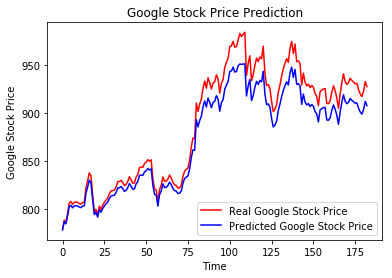

In [86]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Part 4 - Evaluating the RNN

## Estimation from 2012 - 2016

### Getting the real stock price of 2012 - 2016

In [80]:
real_stock_price_train = pd.read_csv('Google_Stock_Price_Train.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

X_train = real_stock_price_train
X_train = sc.transform(X_train)
X_train = np.reshape(X_train, (len(real_stock_price_train), 1, 1))


### Getting the predicted stock price of 2012 - 2016

In [81]:
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

### Visualising the results

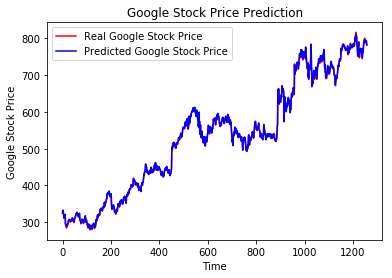

In [82]:
plt.plot(real_stock_price_train, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Estimation in 2017

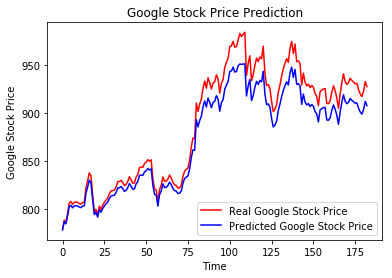

In [84]:
real_stock_price = pd.read_csv('Google_Stock_Price_2017.csv')
real_stock_price = real_stock_price.iloc[:,1:2].values

X_test = real_stock_price
X_test = sc.transform(X_test)
X_test = np.reshape(X_test, (len(real_stock_price), 1, 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()